In [1]:
import rdkit.Chem.Scaffolds.MurckoScaffold as MurckoScaffold

In [2]:
import core_sets

reload(core_sets)

from core_sets import get_core_diffs, get_core_sets

In [3]:
# ChEMBL connection...

engine = create_engine(open('database.txt').read().strip())

In [4]:
# Threshold number of distinct active parent compounds...

min_n_active = 40

In [5]:
symbols = pd.read_pickle('human_symbols_with_counts.pkl').query('n_active >= 40')

In [6]:
symbols.shape

(140, 5)

In [7]:
symbol = 'ABCB1'

df = pd.read_sql_query("select parent_cmpd_chemblid as chembl_id, smiles from tt_curve_data_actives where species = 'Human' and symbol = :symbol", engine, params={'symbol': symbol})

In [9]:
df.shape

(784, 2)

In [10]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles', molCol='mol')

df.drop('smiles', axis=1, inplace=True)

In [11]:
PandasTools.AddMurckoToFrame(df, molCol='mol', MurckoCol='core_smiles', Generic=False)

PandasTools.AddMoleculeColumnToFrame(df, smilesCol='core_smiles', molCol='core_mol')

df['core_mol'] = df['mol'].apply(lambda x: MurckoScaffold.GetScaffoldForMol(x))

df['core_smiles'] = df['core_mol'].apply(lambda x: Chem.MolToSmiles(x, isomericSmiles=True))

In [19]:
# df.head()

In [13]:
def f(smiles):
    
    mol = Chem.MolFromSmiles(smiles)
    
    mol.SetProp('_Name', smiles)
    
    return mol
    
cores = [f(x) for x in df['core_smiles'].unique()]

In [26]:
len(cores)

362

In [27]:
df1 = get_core_diffs(cores)

[2015/Jul/20 17:11:48 INFO    ] Number of cores: 362
[2015/Jul/20 17:11:48 INFO    ] Number of combinations: 65341
[2015/Jul/20 17:11:48 INFO    ] Done 100/65341 (0.2 %)
[2015/Jul/20 17:11:48 INFO    ] Done 200/65341 (0.3 %)
[2015/Jul/20 17:11:48 INFO    ] Done 300/65341 (0.5 %)
[2015/Jul/20 17:12:17 INFO    ] Done 400/65341 (0.6 %)
[2015/Jul/20 17:12:17 INFO    ] Done 500/65341 (0.8 %)
[2015/Jul/20 17:12:17 INFO    ] Done 600/65341 (0.9 %)
[2015/Jul/20 17:12:17 INFO    ] Done 700/65341 (1.1 %)
[2015/Jul/20 17:12:18 INFO    ] Done 800/65341 (1.2 %)
[2015/Jul/20 17:12:18 INFO    ] Done 900/65341 (1.4 %)
[2015/Jul/20 17:12:18 INFO    ] Done 1000/65341 (1.5 %)
[2015/Jul/20 17:12:18 INFO    ] Done 1100/65341 (1.7 %)
[2015/Jul/20 17:12:19 INFO    ] Done 1200/65341 (1.8 %)
[2015/Jul/20 17:12:22 INFO    ] Done 1300/65341 (2.0 %)
[2015/Jul/20 17:12:27 INFO    ] Done 1400/65341 (2.1 %)
[2015/Jul/20 17:12:27 INFO    ] Done 1500/65341 (2.3 %)
[2015/Jul/20 17:12:27 INFO    ] Done 1600/65341 (2.4 %

In [28]:
df1.shape

(65341, 6)

In [30]:
df1.sort(['diff_1', 'sim'], inplace=True)

i    j                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
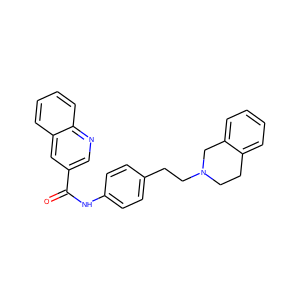
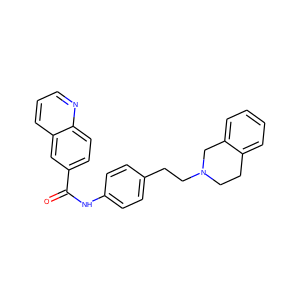
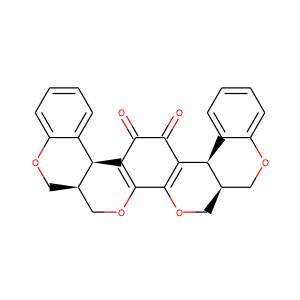
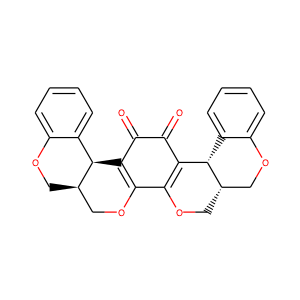
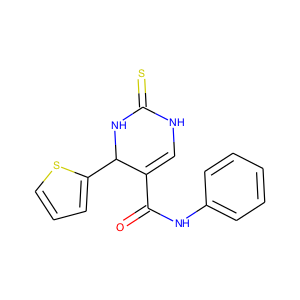
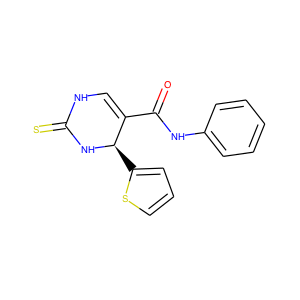
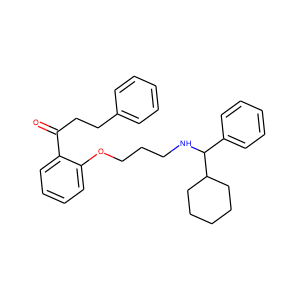
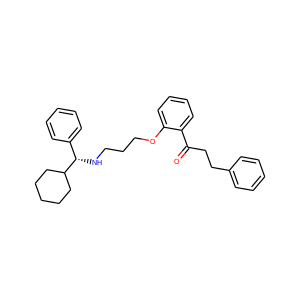
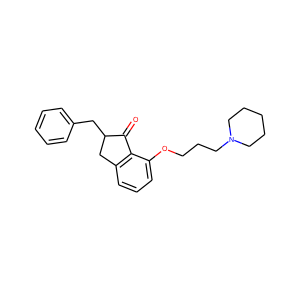
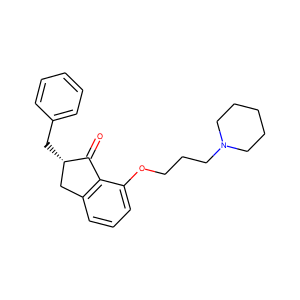
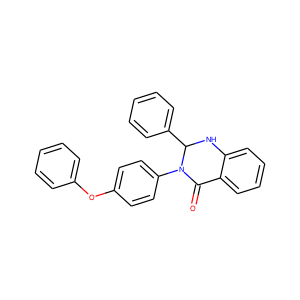
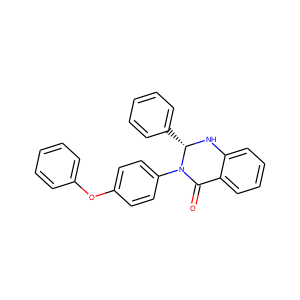
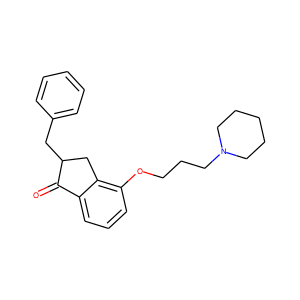
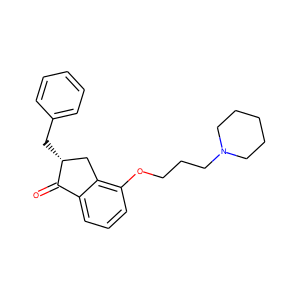
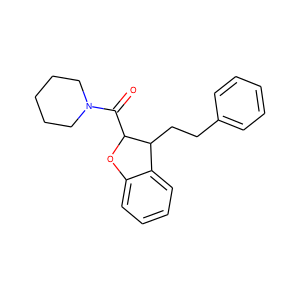
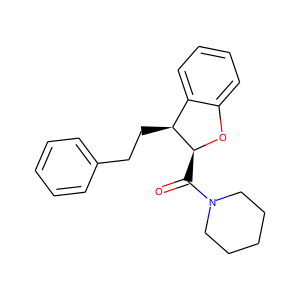
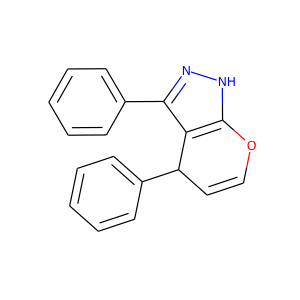
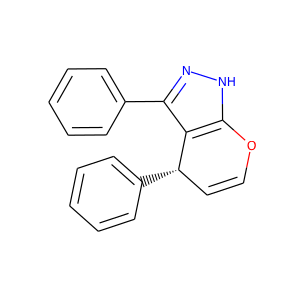
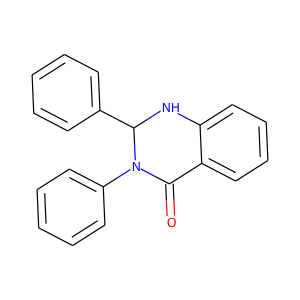
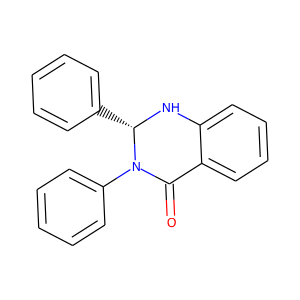
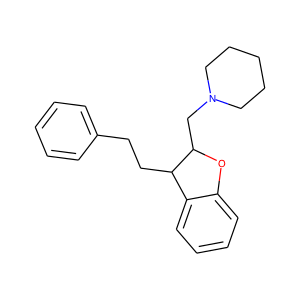
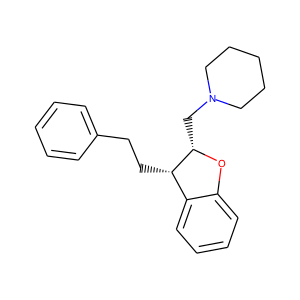
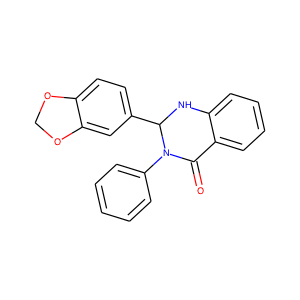
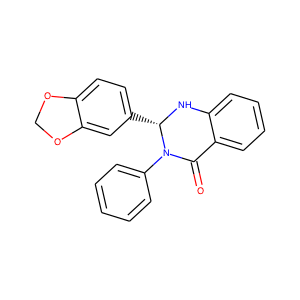
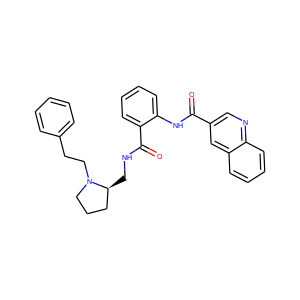
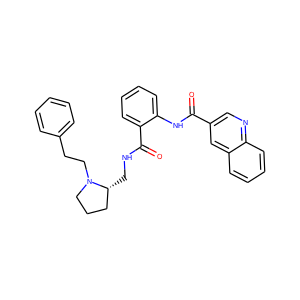
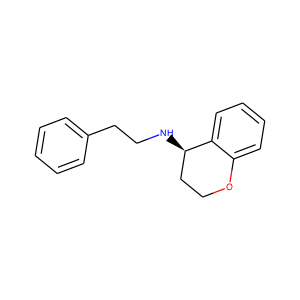
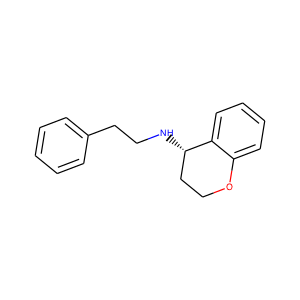
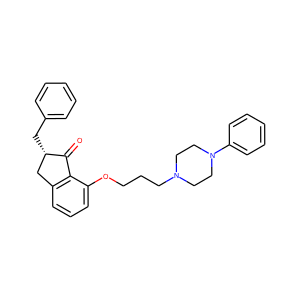
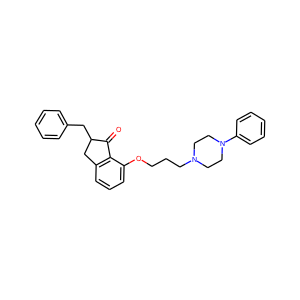
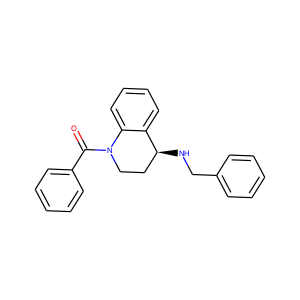
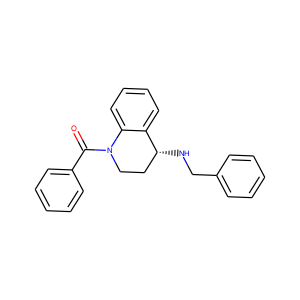
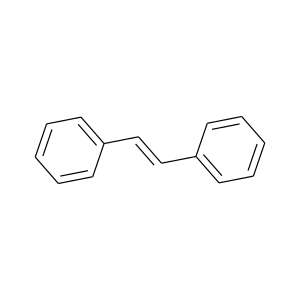
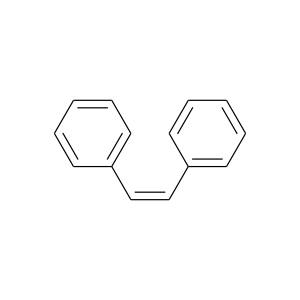
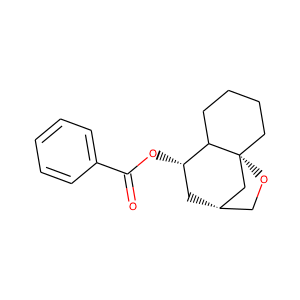
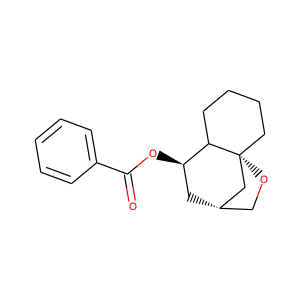
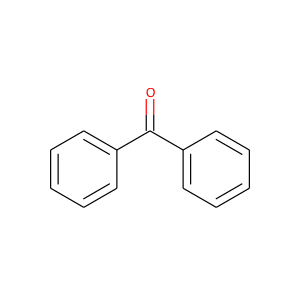
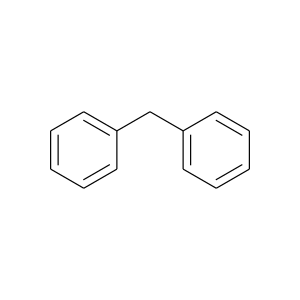
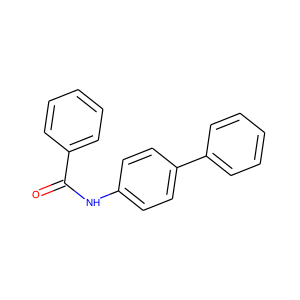
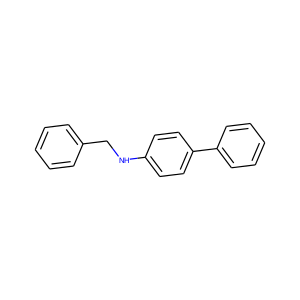
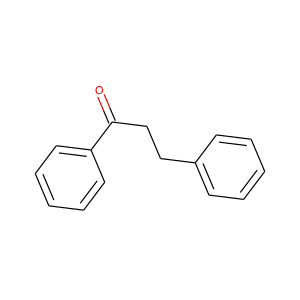
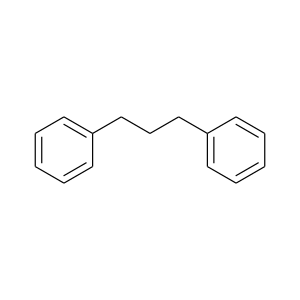
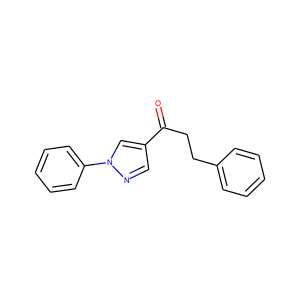
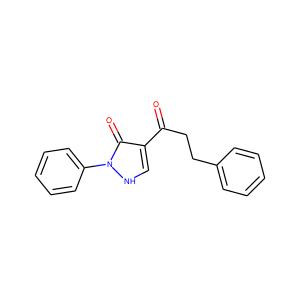
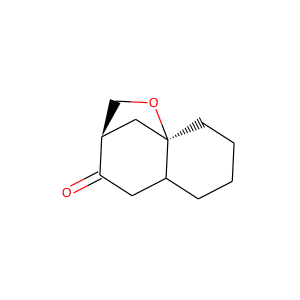
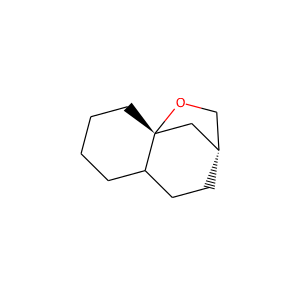
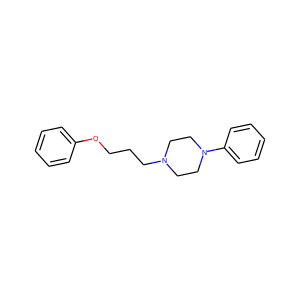
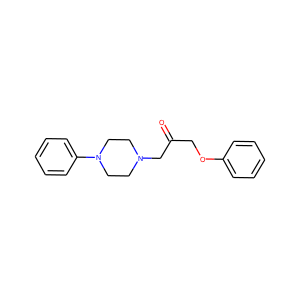
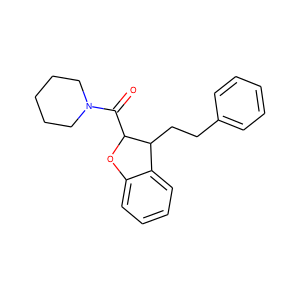
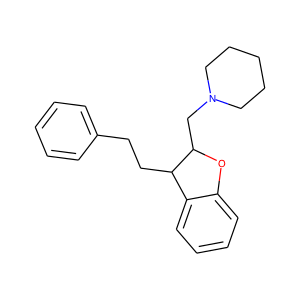
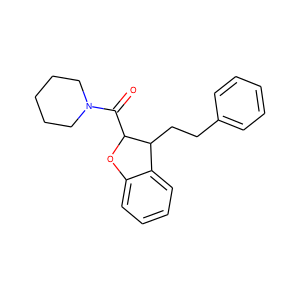
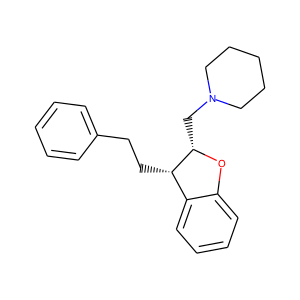
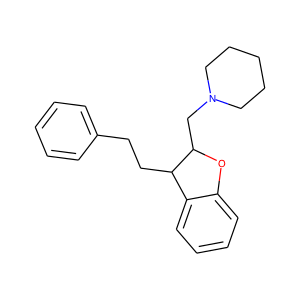
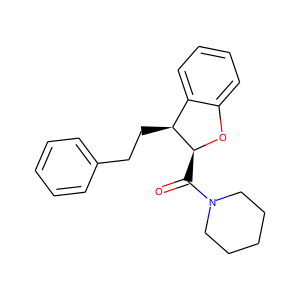
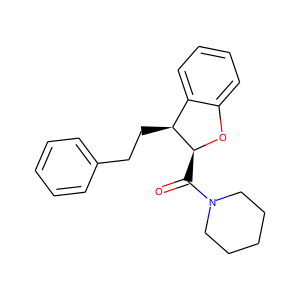
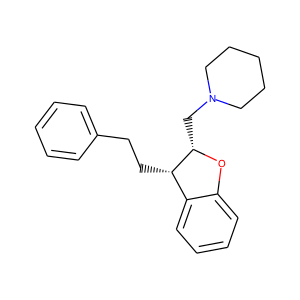
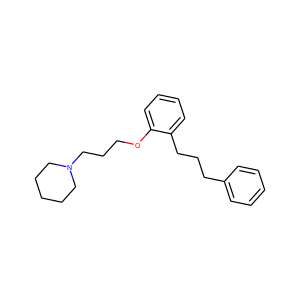
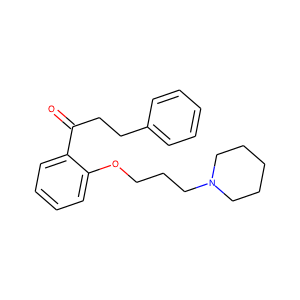
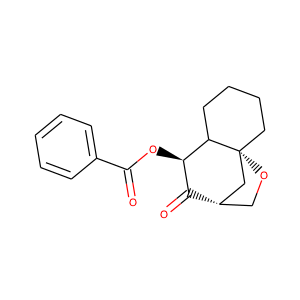
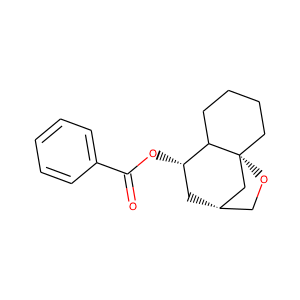
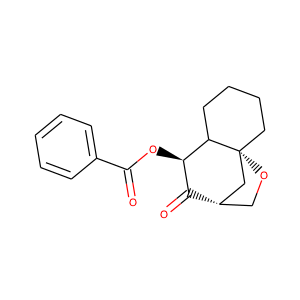
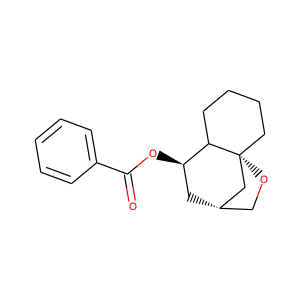
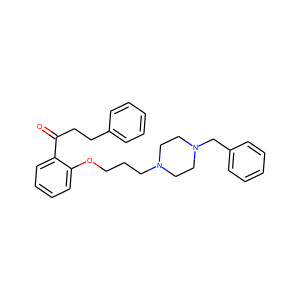
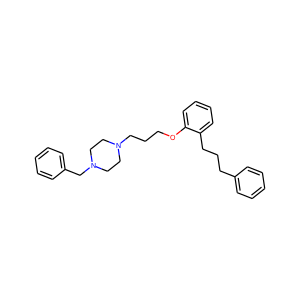
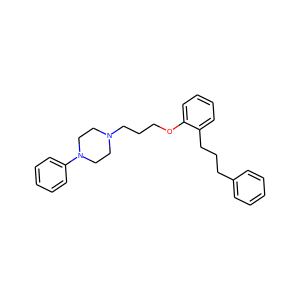
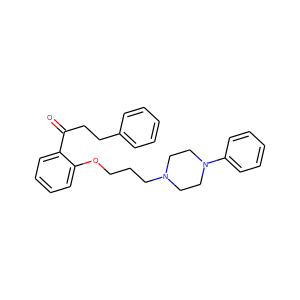
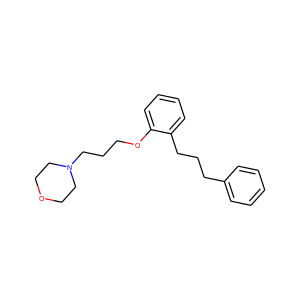
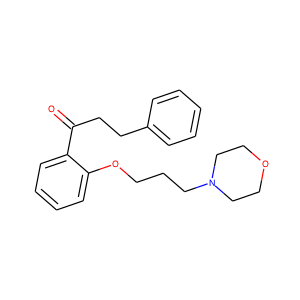
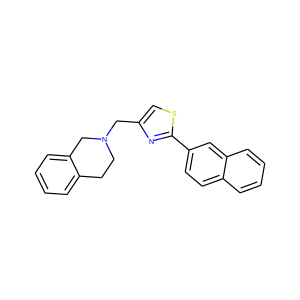
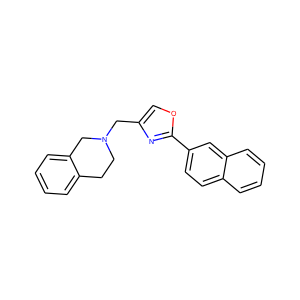
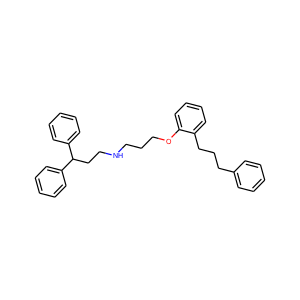
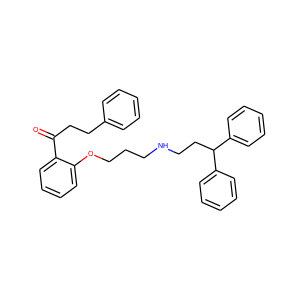
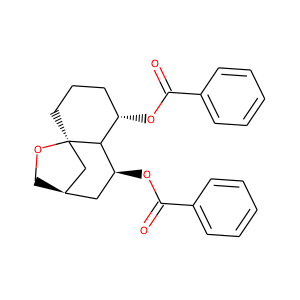
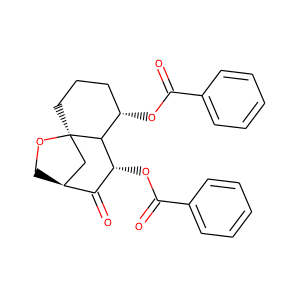
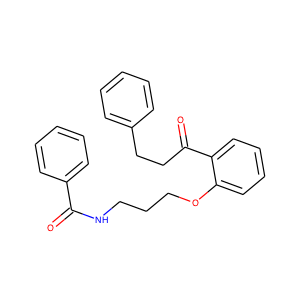
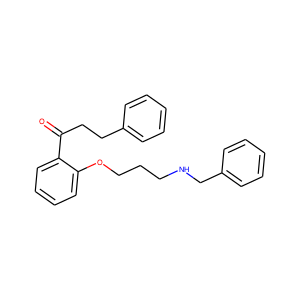
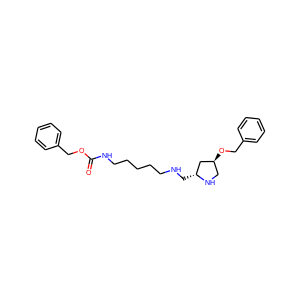
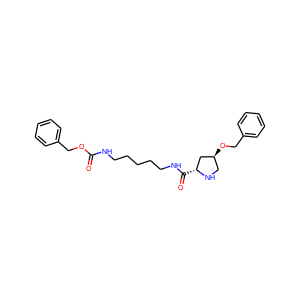
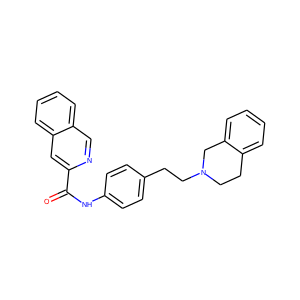
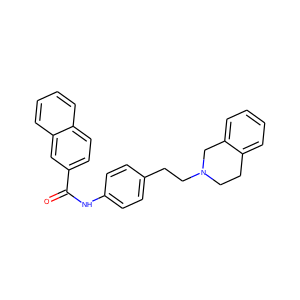
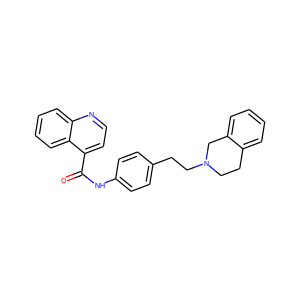
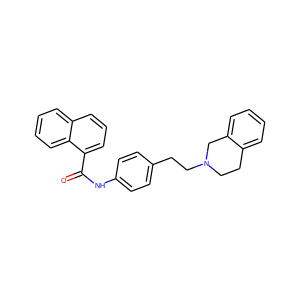
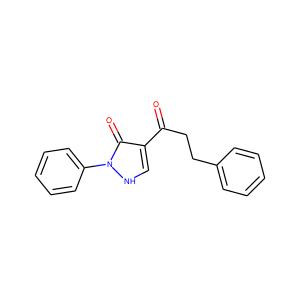
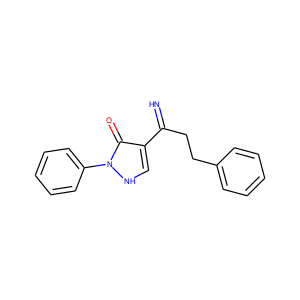
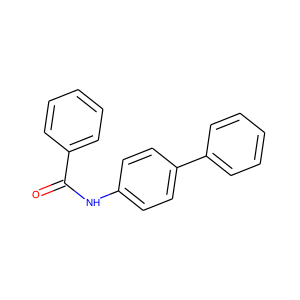
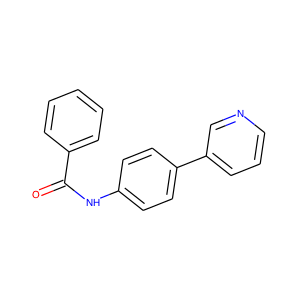
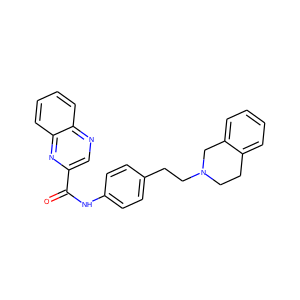
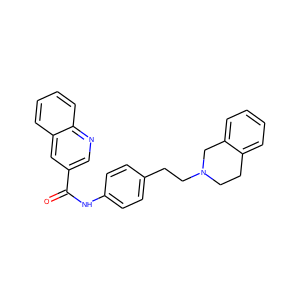
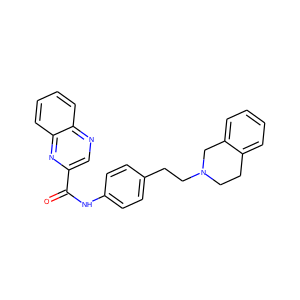
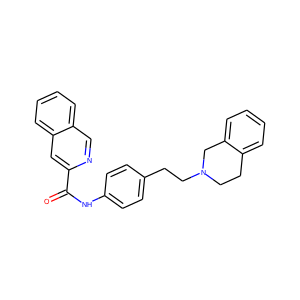
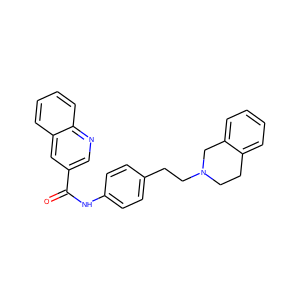
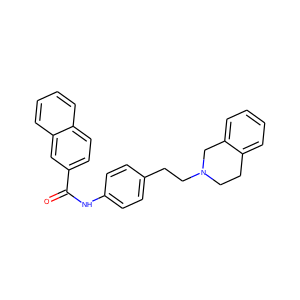
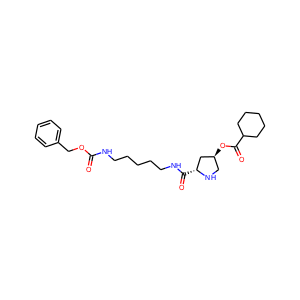
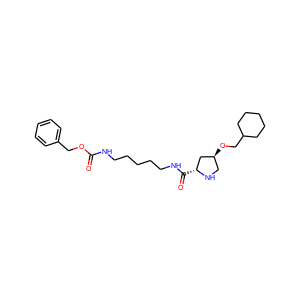
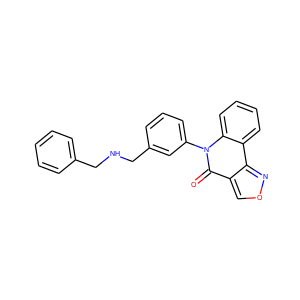
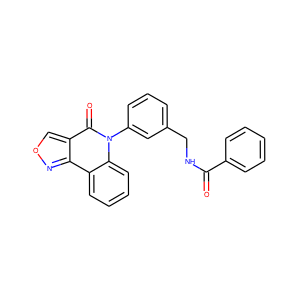
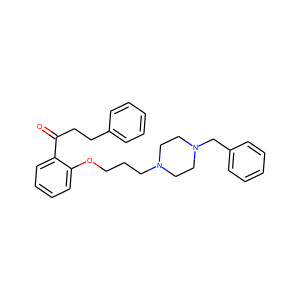
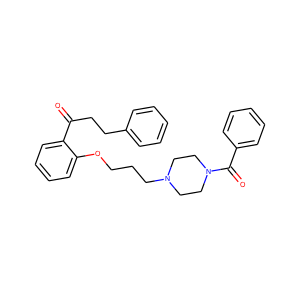
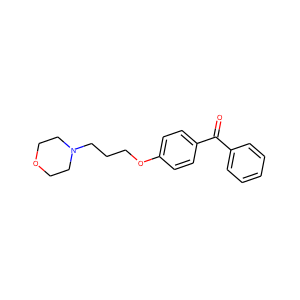
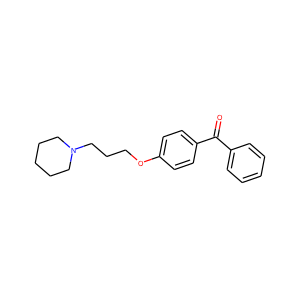
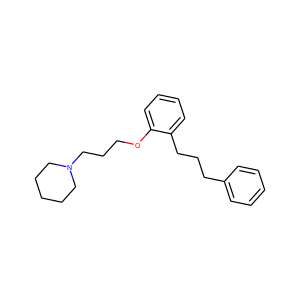
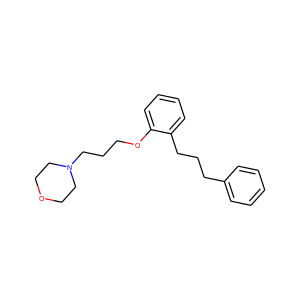
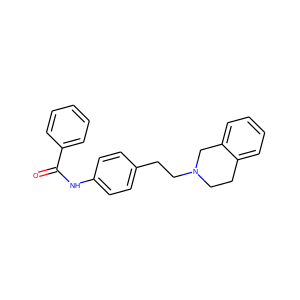
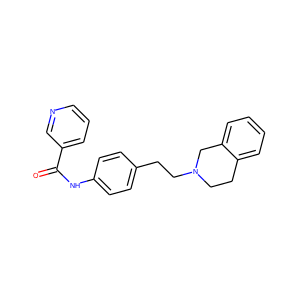
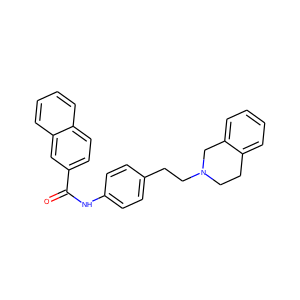
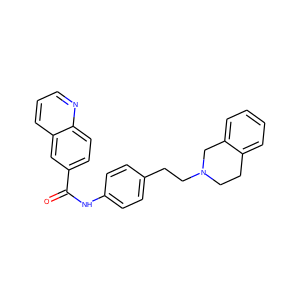
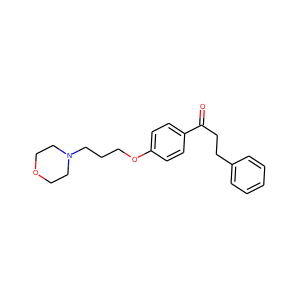
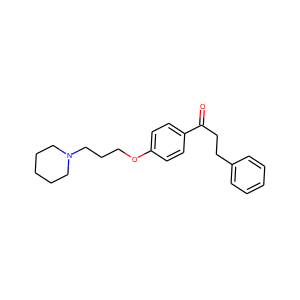
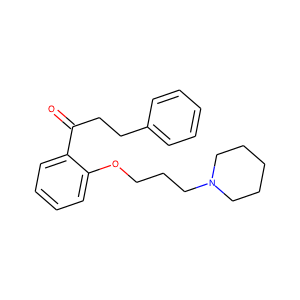
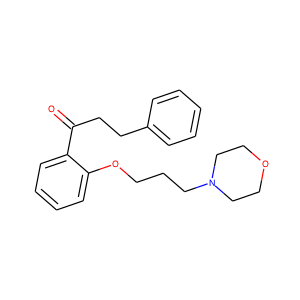
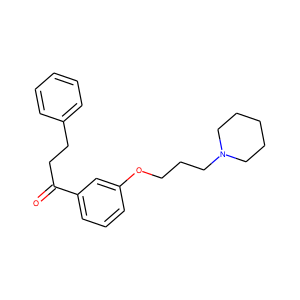
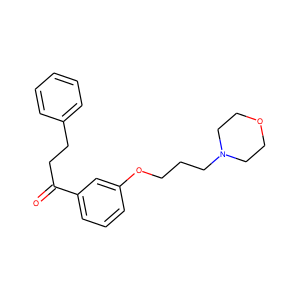
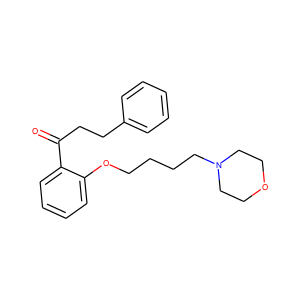
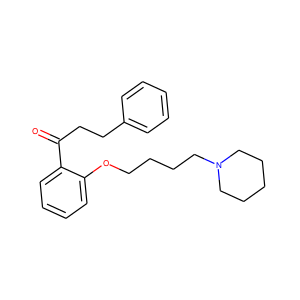
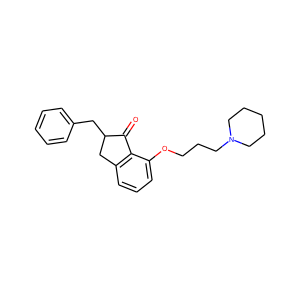
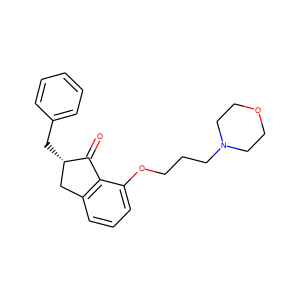
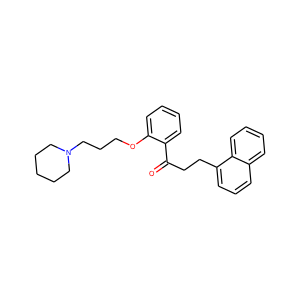
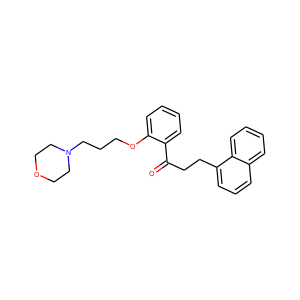
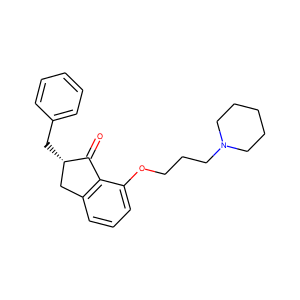
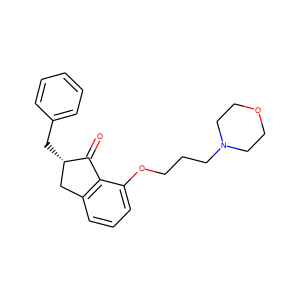
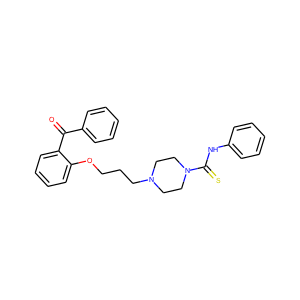
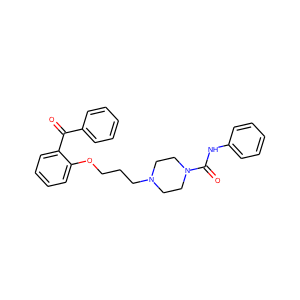
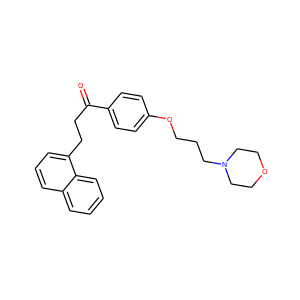
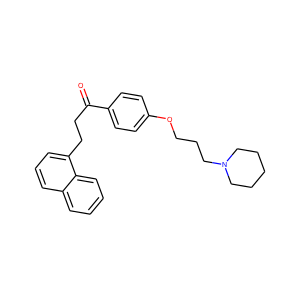
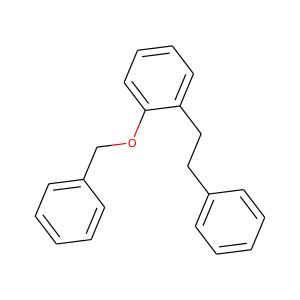
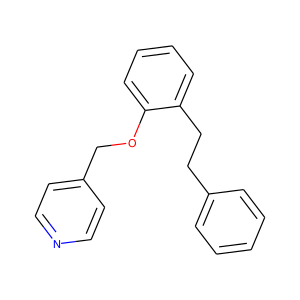
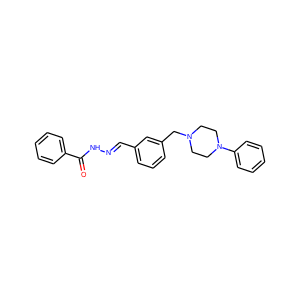
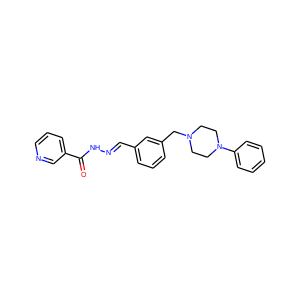
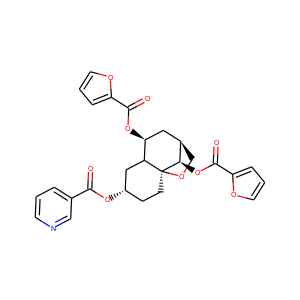
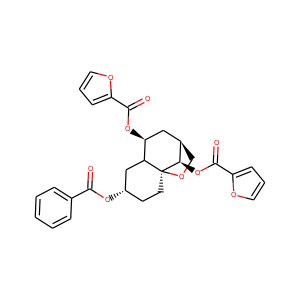
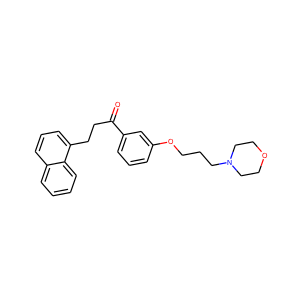
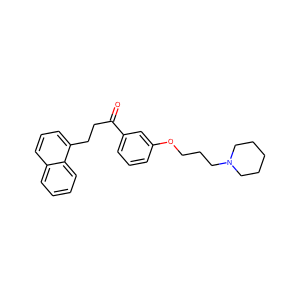
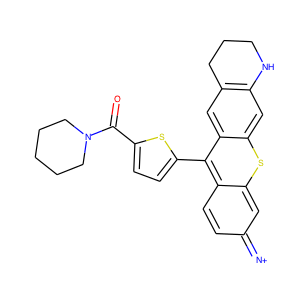
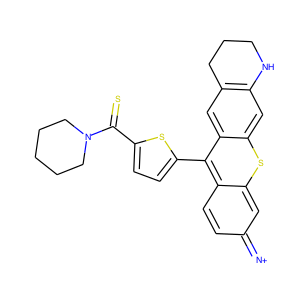
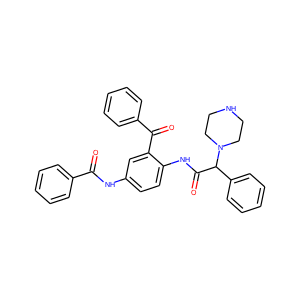
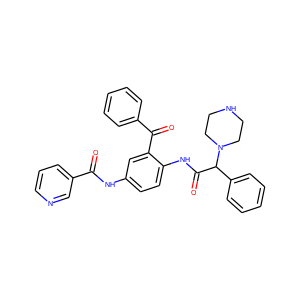
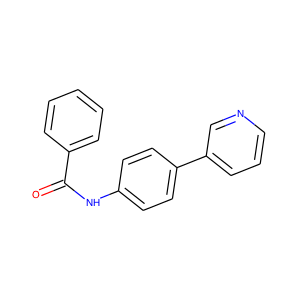
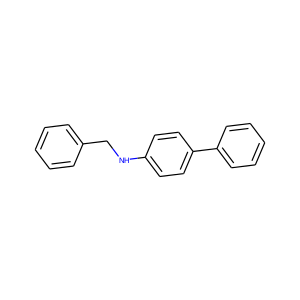
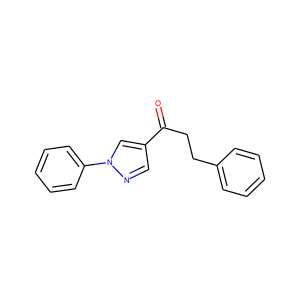
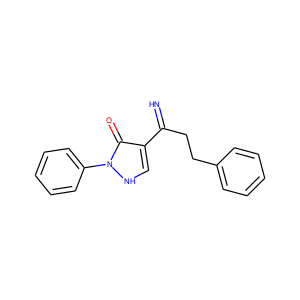
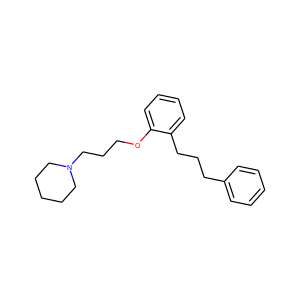
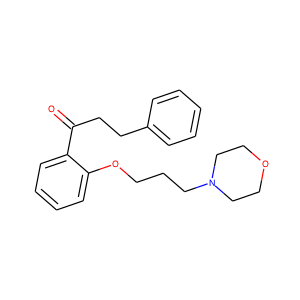
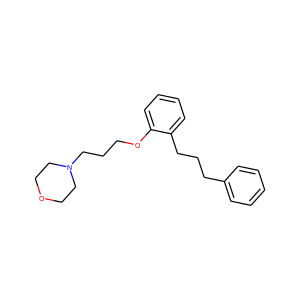
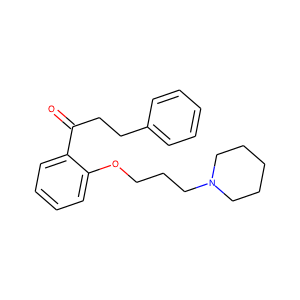
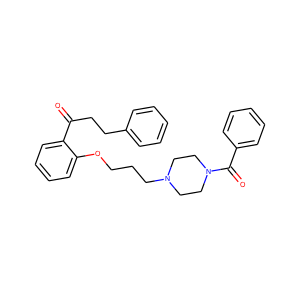
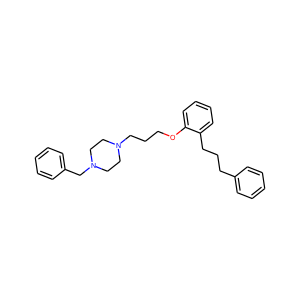
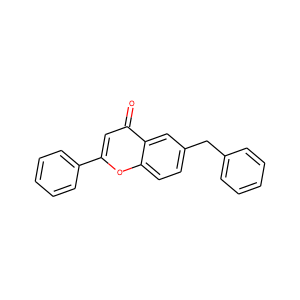
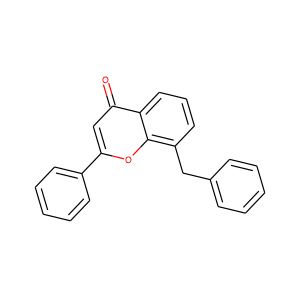
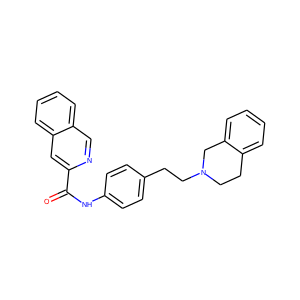
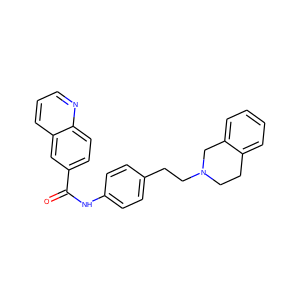
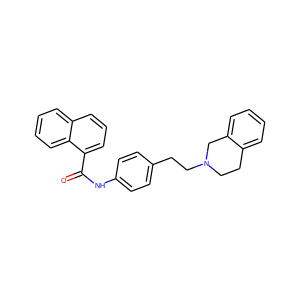
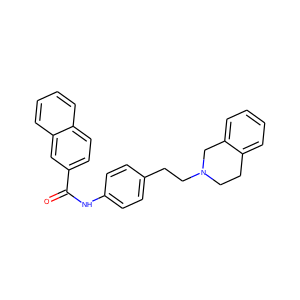
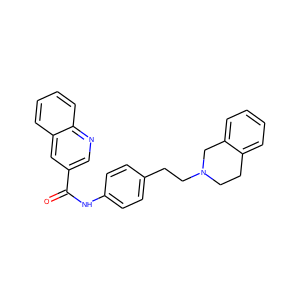
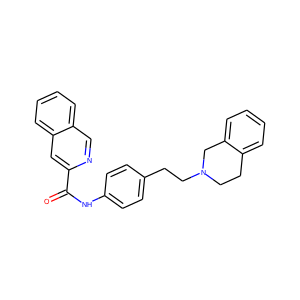
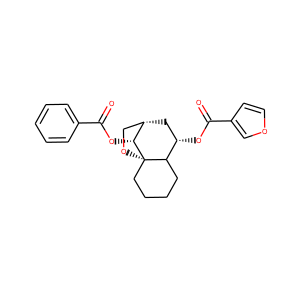
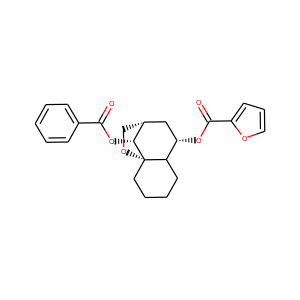
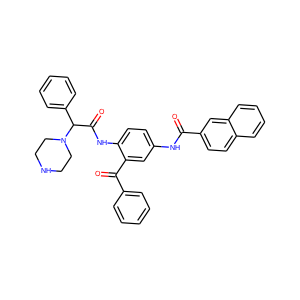
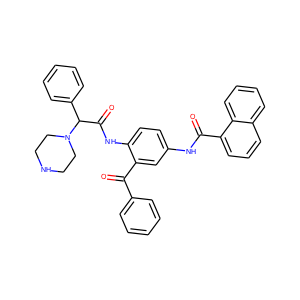
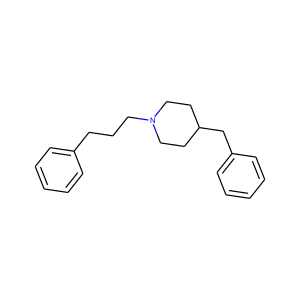
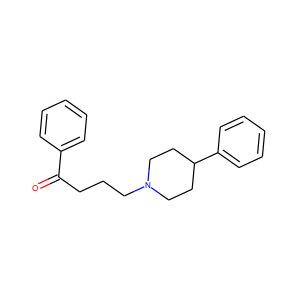
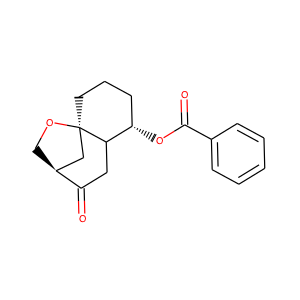
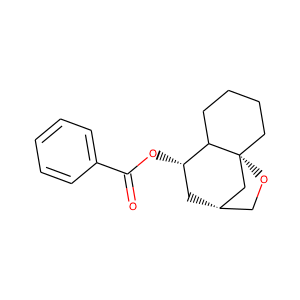
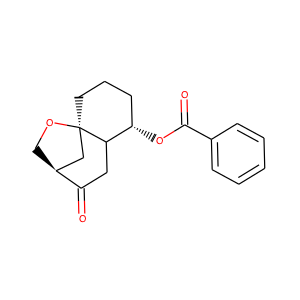
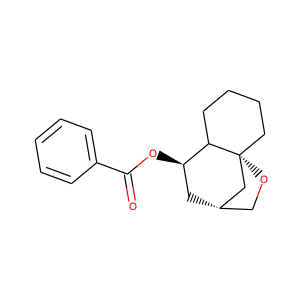
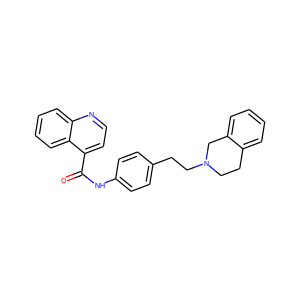
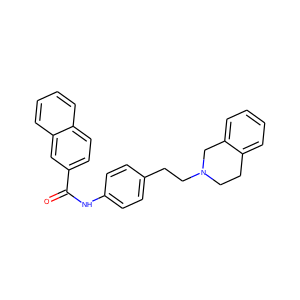
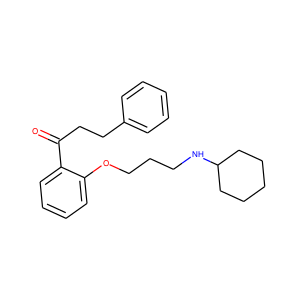
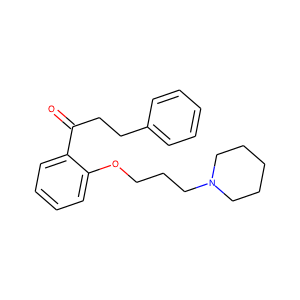
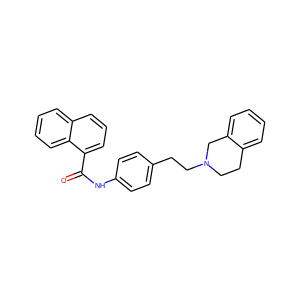
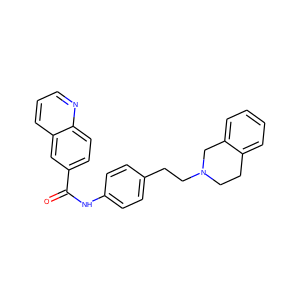
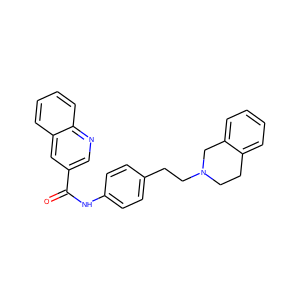
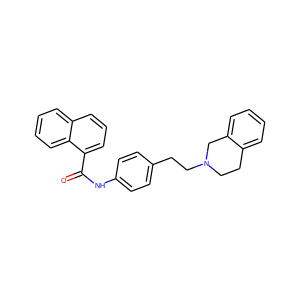
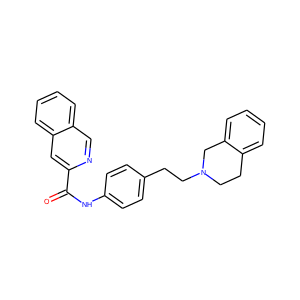
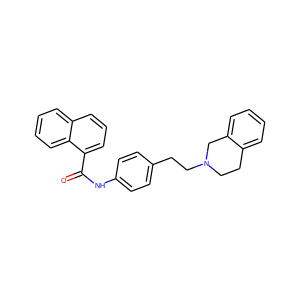
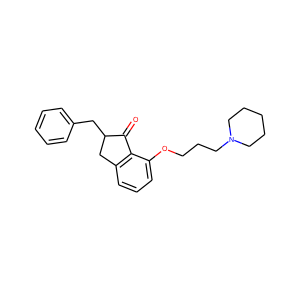
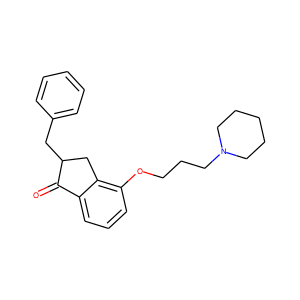
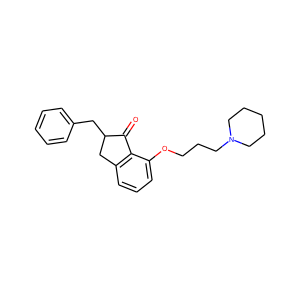
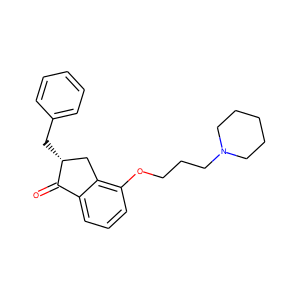
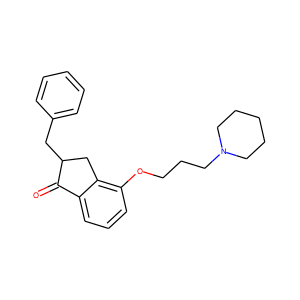
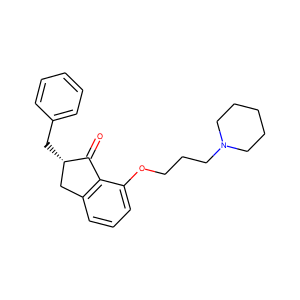
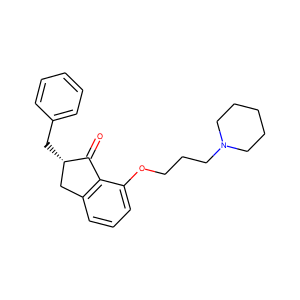
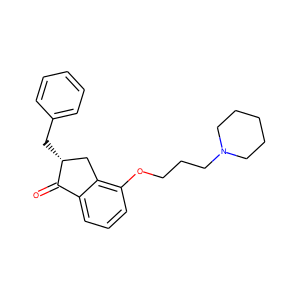
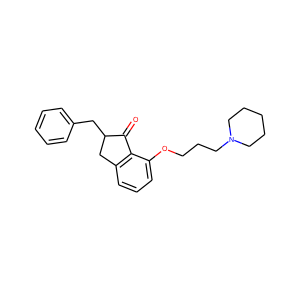
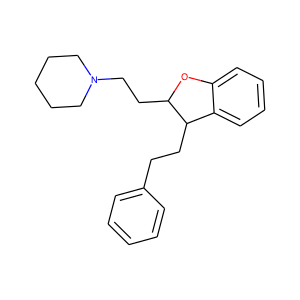
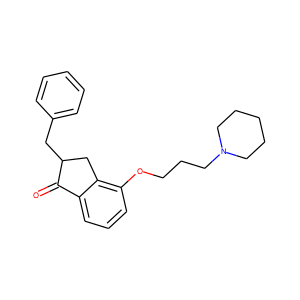
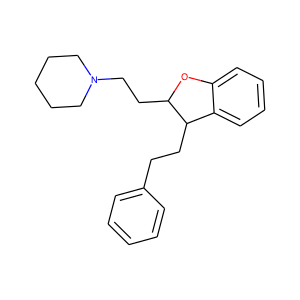
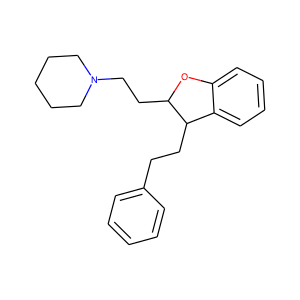
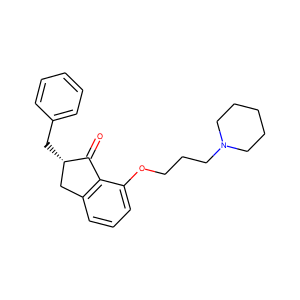
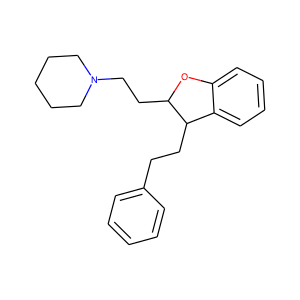
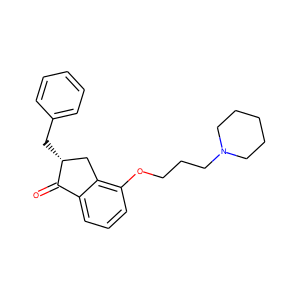
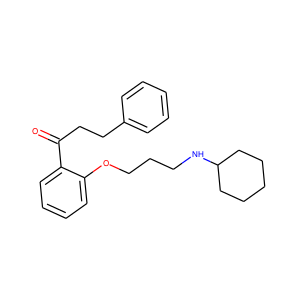
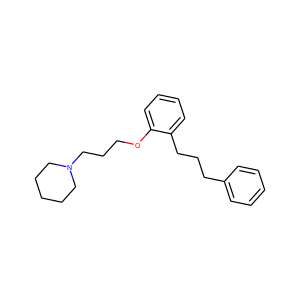
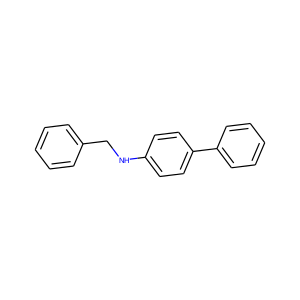
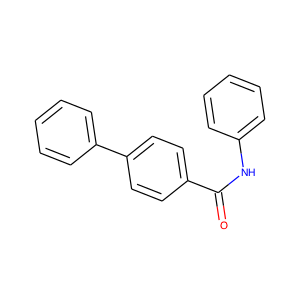
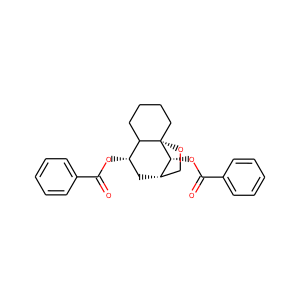
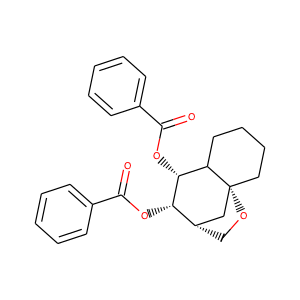
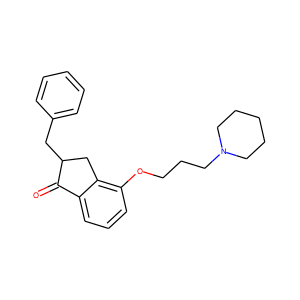
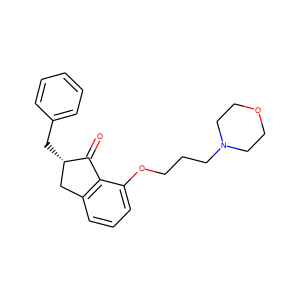
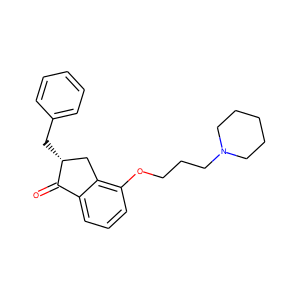
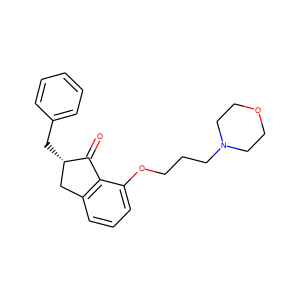

In [31]:
df1.head(100)

In [39]:
mol_0, mol_1 = df1.loc[57649, ['mol_0', 'mol_1']]

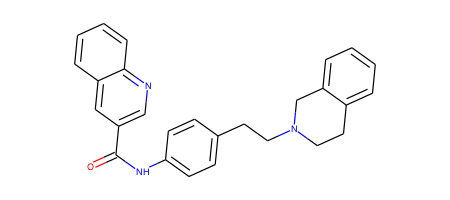

In [40]:
mol_0

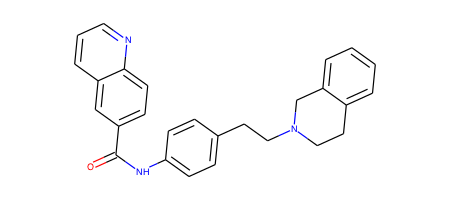

In [41]:
mol_1

[2015/Jul/21 11:18:10 INFO    ] Number of cores: 2
[2015/Jul/21 11:18:10 INFO    ] Number of combinations: 1


i  j                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
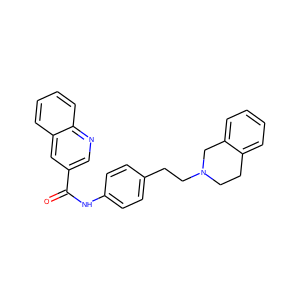
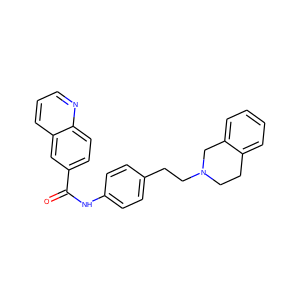

In [42]:
get_core_diffs([mol_0, mol_1])

In [72]:
mol_0, mol_1 = [Chem.MolFromSmiles(x) for x in ['CCc1cnc2ccccc2c1', 'CCc1ccc2ncccc2c1']]

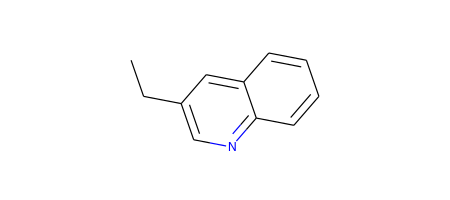

In [73]:
mol_0

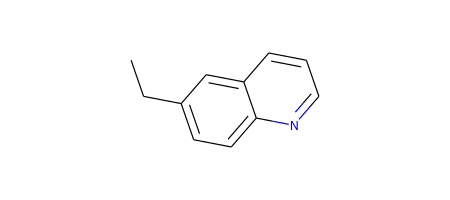

In [74]:
mol_1

[2015/Jul/21 11:21:59 INFO    ] Number of cores: 2
[2015/Jul/21 11:21:59 INFO    ] Number of combinations: 1


i  j                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
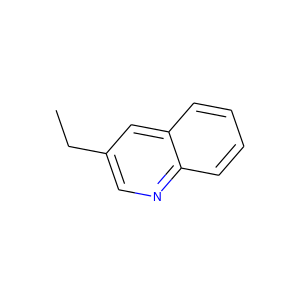
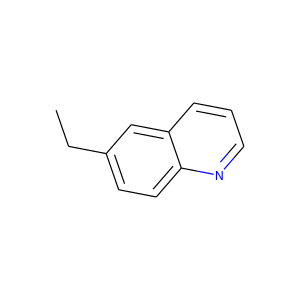

In [75]:
get_core_diffs([mol_0, mol_1])